In [697]:
import numpy as np
import sys
import pandas as pd
from scipy.stats import f
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power
sns.set(color_codes=True)

In [698]:
df1=pd.read_csv('McDonald.csv')


Variables with Outliers on the maximum side
---------------------------------------------
Calories


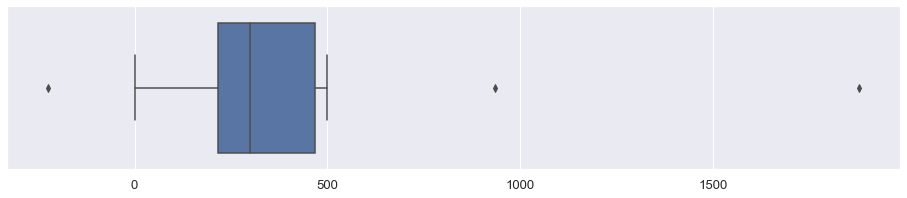

Calories from Fat


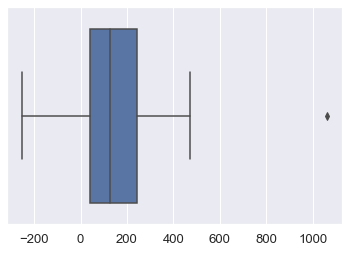

Total Fat


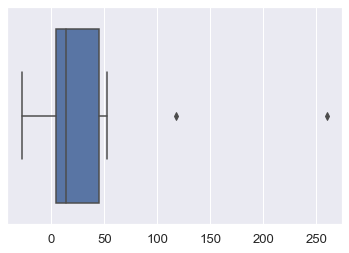

Total Fat (% Daily Value)


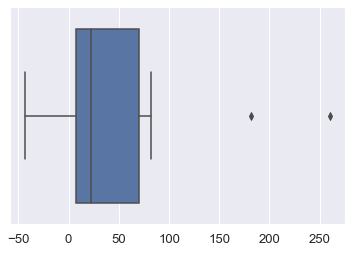

Trans Fat


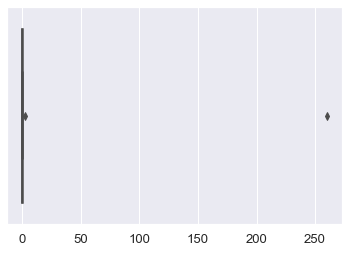

Cholesterol


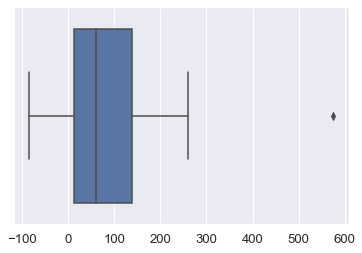

Cholesterol (% Daily Value)


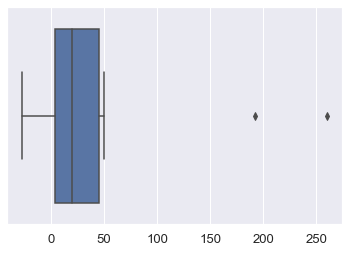

Sodium


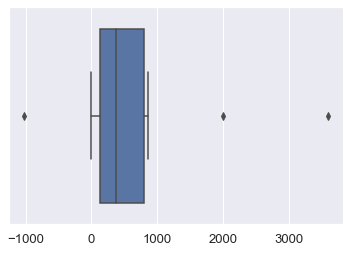

Sodium (% Daily Value)


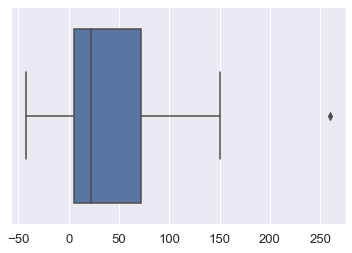

Carbohydrates


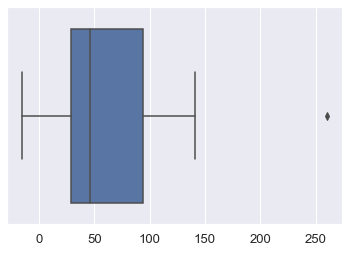

Carbohydrates (% Daily Value)


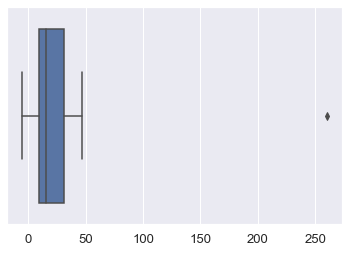

Dietary Fiber (% Daily Value)


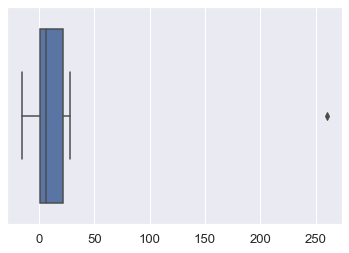

Sugars


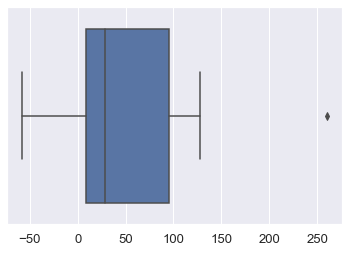

Protein


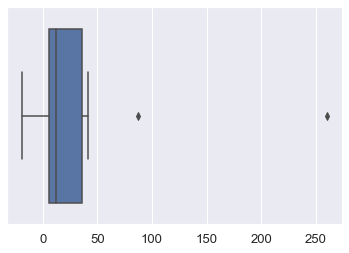

Vitamin A (% Daily Value)


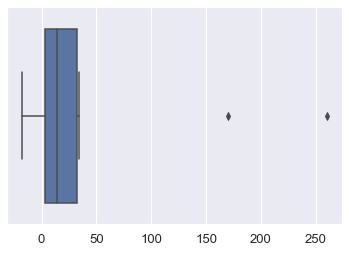

Vitamin C (% Daily Value)


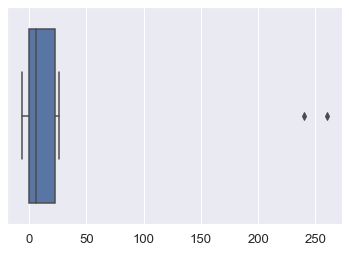

Calcium (% Daily Value)


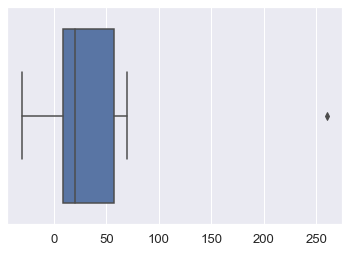

Iron (% Daily Value)


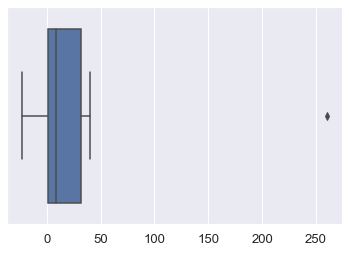

No variables have outliers with values on the minimum side


In [727]:
#2. Which all variables have an outlier?
df2=df1.describe().T.reset_index()

InterQuartileThreshold=(df2['75%']-df2['25%'])*1.5
df2['Outlierthresholdformax']=df2['75%']+InterQuartileThreshold
df2['Outlierthresholdformin']=df2['25%']-InterQuartileThreshold
# df2[df2['min']<df2['Outlierthresholdformin']]
df3=df2[df2['max']>df2['Outlierthresholdformax']].set_index('index')
if len(df3)>0:
    print('Variables with Outliers on the maximum side')
    print('-'*len('Variables with Outliers above Q3 listed below'))
    plt.figure(figsize=(16,3))
    for i in df3.index:
        print(i)
        sns.boxplot(df3.loc[[i]])
        plt.show()
else:
    print('No variables have outliers with values on the maximum side')

df4=df2[df2['min']<df2['Outlierthresholdformin']].set_index('index')
if len(df4)>0:
    print('Variables with Outliers on the minimum side listed below')
    print('-'*len('Variables with Outliers on the minimum side listed below'))
    plt.figure(figsize=(16,3))
    for i in df3.index:
        print(i)
        sns.boxplot(df4.loc[[i]])
        plt.show()
else:
    print('No variables have outliers with values on the minimum side')


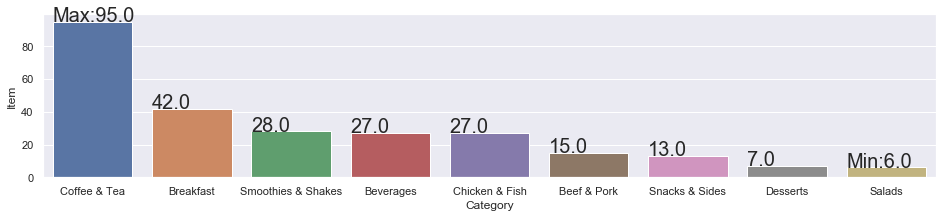

In [700]:
#1. Plot graphically which food categories have highest and lowest varieties?
df2=df1[['Category','Item']].groupby('Category').count().reset_index() 
df2=df2.sort_values(by='Item',ascending=False)
plt.figure(figsize=(16,3))
# ptplot=sns.pointplot(df2['Category'],df2['Item'])
cplot=sns.barplot(df2['Category'],df2['Item'])
length=df2['Item'].size-1
ctr=0
for p in cplot.patches:
    if ctr==0:
        display_value='Max:'+str(p.get_height())
    elif ctr==length:
        display_value='Min:'+str(p.get_height())
    else:
        display_value=p.get_height()
    cplot.annotate(format(display_value),(p.get_x(),p.get_height()),fontsize=20)
    ctr=ctr+1


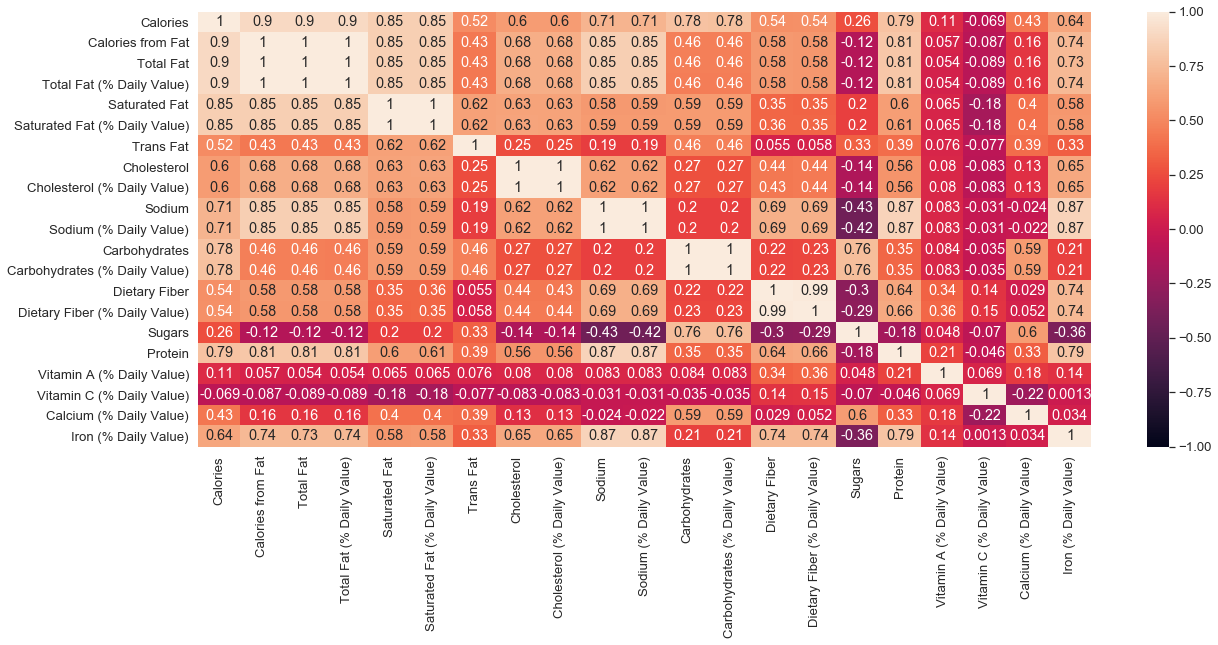


Printing better positive corelations for column: Calories
---------------------------------------------------------
Calories from Fat                0.904588
Total Fat                        0.904409
Total Fat (% Daily Value)        0.904123
Saturated Fat                    0.845564
Saturated Fat (% Daily Value)    0.847631
Sodium                           0.712309
Sodium (% Daily Value)           0.713415
Carbohydrates                    0.781539
Carbohydrates (% Daily Value)    0.781242
Protein                          0.787847
Name: Calories, dtype: float64

Printing better positive corelations for column: Calories from Fat
------------------------------------------------------------------
Calories                         0.904588
Total Fat                        0.999663
Total Fat (% Daily Value)        0.999725
Saturated Fat                    0.847008
Saturated Fat (% Daily Value)    0.849592
Sodium                           0.846624
Sodium (% Daily Value)           0.847276
Pro

In [701]:
#3. Which variables have highest co releation? Plot them and find the value

df_cor=df1.corr()
plt.figure(figsize=(20,8))
sns.set(font_scale=1.2)
sns.heatmap(df_cor,annot=True,vmin=-1,vmax=1)
plt.show()


df_cor_positively_better_corelated=df_cor[df_cor.loc[:,:]>0.7][df_cor.loc[:,:]<1]
df_cor_negatively_better_corelated=df_cor[df_cor.loc[:,:]<-0.7][df_cor.loc[:,:]>-1]

# print(df_cor[df_cor_positively_better_corelated.iloc[:,1].notnull()].iloc[:,1].count())
for i in df_cor.columns:
    cnt=df_cor[df_cor_positively_better_corelated.loc[:,i].notnull()].loc[:,i].count()
    if cnt > 1:
        a='Printing better positive corelations for column: '+i
        print('\n'+a)
        print('-'*len(a))
        print(df_cor[df_cor_positively_better_corelated.loc[:,i].notnull()].loc[:,i])
    
for i in df_cor.columns:
    cnt=df_cor[df_cor_negatively_better_corelated.loc[:,i].notnull()].loc[:,i].count()
    if cnt > 1:
        a='Printing better negative corelations for column: '+i
        print('\n'+a)
        print('-'*len(a))
        print(df_cor[df_cor_negatively_better_corelated.loc[:,i].notnull()].loc[:,i])



In [702]:
# 4. Which  category contributes to the % of maxiumum Cholesterol (% Daily Value)?
df2=df1[['Category','Cholesterol (% Daily Value)']].groupby('Category').max().sort_values(by='Cholesterol (% Daily Value)',ascending=False).reset_index().iloc[0:1]
a="".join(df2.iloc[[0],[0]].iloc[0].values)
# print("".join(str(df2.iloc[[0],[1]].iloc[0].values)))
for i in df2.iloc[[0],[1]].iloc[0].values:
    b=i
print(a+" contributes to the  % of maxiumum Cholesterol (% Daily Value) intake upto "+str(b))

Breakfast contributes to the  % of maxiumum Cholesterol (% Daily Value) intake upto 192


In [703]:
# 5. Which item contributes to maximum Sodium intake?
# df1[['Category','Sodium']].groupby('Category').max().sort_values(by='Sodium',ascending=False)[0:1].iloc[0:1]
df2=df1[['Category','Sodium']].groupby('Category').max().sort_values(by='Sodium',ascending=False)[0:1].reset_index().iloc[0:1]
a="".join(df2.iloc[[0],[0]].iloc[0].values) 
for i in df2.iloc[[0],[1]].iloc[0].values:
    b=i
print(a+" contributes to the maximum Sodium intake of upto "+str(b))


Chicken & Fish contributes to the maximum Sodium intake of upto 3600


In [695]:
#6. Which 4 food items contains most amount of saturated fat?

df2=df1[['Item','Saturated Fat']].groupby('Item').max().sort_values(by='Saturated Fat',ascending=False).reset_index().iloc[0:4]

topic="4 food items with most amount of saturated food are:"
print(topic)
print('-'*len(topic))
for i in range(4):
    a="".join(df2.iloc[[i],[0]].iloc[0].values) 
    for j in df2.iloc[[i],[1]].iloc[0].values:
        b=j
        print(str(i+1)+". "+'{0: <44}'.format(a)+" contains "+str(b))
    

4 food items with most amount of saturated food are:
----------------------------------------------------
1. McFlurry with M&M’s Candies (Medium)         contains 20.0
2. Big Breakfast with Hotcakes (Large Biscuit)  contains 20.0
3. Chicken McNuggets (40 piece)                 contains 20.0
4. Frappé Chocolate Chip (Large)                contains 20.0
